### Installing Dependencies 

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

### Generating dataset

In [2]:
from sklearn.datasets import make_circles, make_classification, make_moons

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)

rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)  # Adding random noise 
linearly_separable = (X, y)

In [4]:
# random_state sets the random seed for reproducibility

# the make_moons and make_circles generates two class datasets in the shape as the name suggests
datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]



### Building Classifiers

In [12]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [6]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

In [7]:

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

#### Working of various classifiers:
1.KNN:Computes distances between data points and assigns the class that is most common among the k nearest neighbors

2.LVSM: Finds the hyperplane that best separates the classes in a linearly separable dataset

3.RBF SVM: Like LVSM but uses non-linear(here SVC with gamma, which is the coefficient of RBF and C is the regularization parameter)

4.Neural Network: Uses multiple layers with each layer having nodes which take the weighted sum of inputs from the previous layer and use an activation function to add non-linearities. It uses forward propagation to compute the output and backword propagation to adjust the weights and bias

5.Gaussian: Represents functions as Gaussian distributions and updates the distribution based on observed data points

6.Decision Tree: Recursively splits the data based on features to create a tree structure. Nodes represent decisions based on features

7.Random Forest: Builds multiple decision trees using random subsets of features and averages their predictions, helps in reducing overfitting

8.Ada Boost: Assigns higher weights to misclassified samples, making subsequent weak learners focus more on those samples

9.Naive Bayes: Computes the probability of each class given the data by combining the probabilities of individual features

10.QDA : Models the distribution of each class using quadratic surfaces

### Testing model and recording accuracy

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

[0.975, 0.875, 0.975, 0.975, 0.95, 0.95, 0.9, 0.925, 0.875, 0.85]
[0.925, 0.4, 0.875, 0.9, 0.775, 0.75, 0.875, 0.825, 0.7, 0.725]
[0.95, 0.925, 0.95, 0.925, 0.95, 0.95, 0.95, 0.95, 0.95, 0.925]


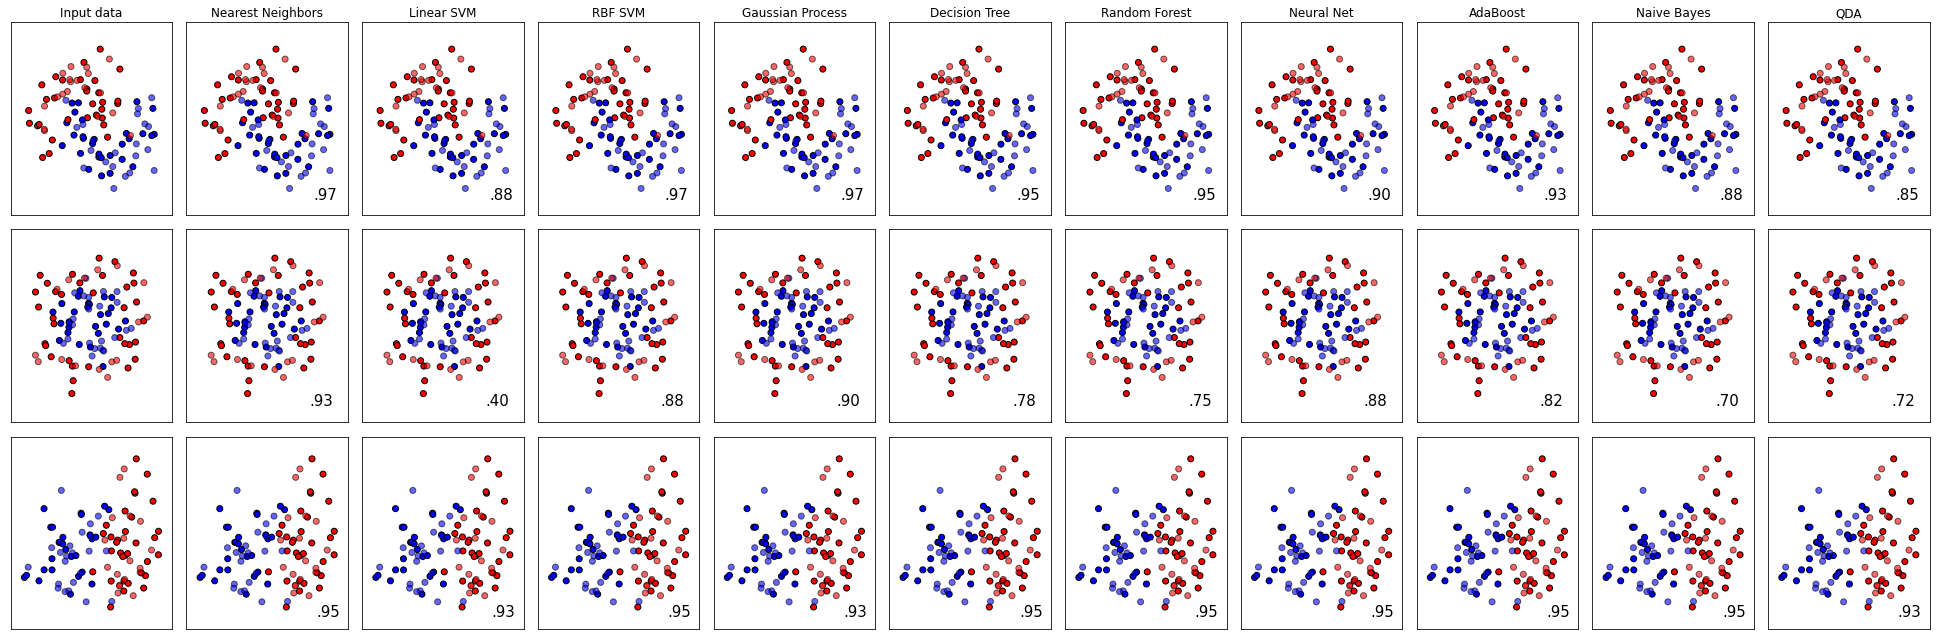

In [21]:
figure = plt.figure(figsize=(27, 9))
i = 1
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # plotting the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1,i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    scores=[]
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1,i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        scores.append(score)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1
    
    print(scores)
plt.tight_layout()
plt.show()

#### For some reason the Decision Boundary function did not work, so I just recorded the accuracies